# INSTALLING REQUIRED LIBRARIES

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

# GETTING THE DATASET

In [4]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod2.csv"
df = pd.read_csv(file_path)
df.head()

,Unnamed: 0.1,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,0,0,Acer,4,2,1,5,14.0,0.551724,8,256,3.52800,978,Low,0,1
1,1,1,Dell,3,1,1,3,15.6,0.689655,4,256,4.85100,634,Low,1,0
2,2,2,Dell,3,1,1,7,15.6,0.931034,8,256,4.85100,946,Low,1,0
3,3,3,Dell,4,2,1,5,13.3,0.551724,8,128,2.69010,1244,Low,0,1
4,4,4,HP,4,2,1,7,15.6,0.620690,8,256,4.21155,837,Low,1,0


# VISUALIZING INDIVIDUAL FEATURE PATTERNS

   ## CONTINOUS VALUES FEATURES

<Axes: xlabel='CPU_frequency', ylabel='Price'>

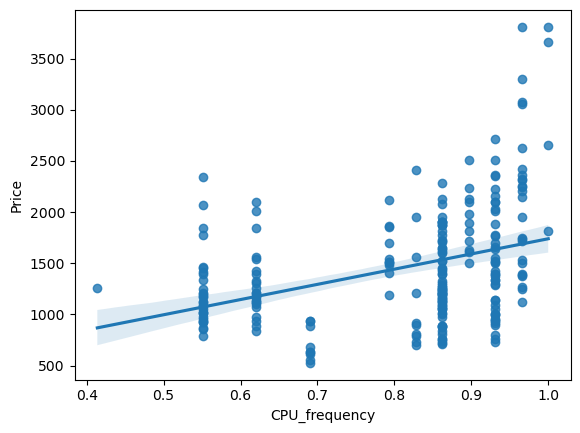

In [6]:
sns.regplot(x='CPU_frequency', y='Price', data=df)

<Axes: xlabel='Screen_Size_inch', ylabel='Price'>

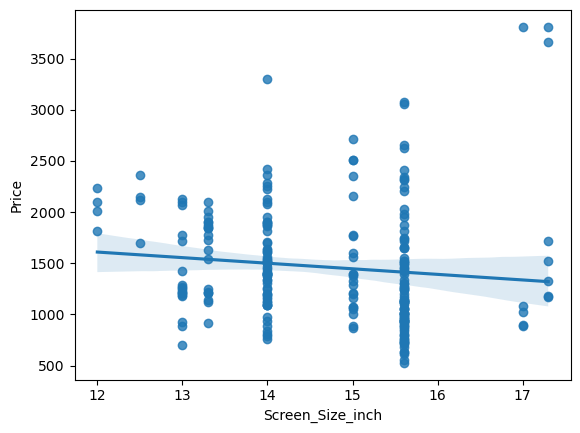

In [7]:
sns.regplot(x='Screen_Size_inch', y='Price', data=df)

<Axes: xlabel='Weight_pounds', ylabel='Price'>

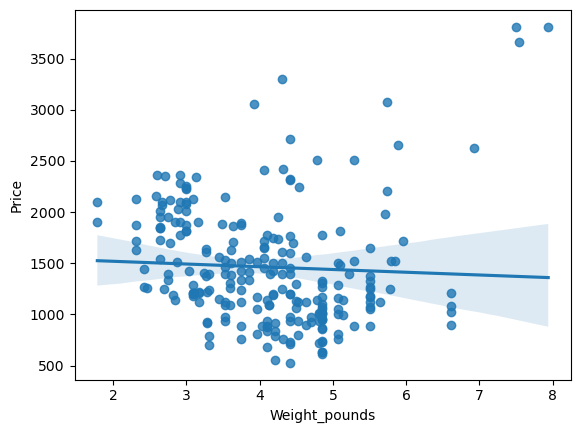

In [8]:
sns.regplot(x='Weight_pounds', y='Price', data=df)

### finding the correlation between 'Screen_Size_inch', 'Weight_pounds', 'CPU_frequency' and 'Price'

In [13]:
for param in ['CPU_frequency','Screen_Size_inch','Weight_pounds']:
    print(f'correlation of price and {param} is ', df[[param, 'Price']].corr())

correlation of price and CPU_frequency is                 CPU_frequency     Price
CPU_frequency       1.000000  0.366666
Price               0.366666  1.000000
correlation of price and Screen_Size_inch is                    Screen_Size_inch     Price
Screen_Size_inch          1.000000 -0.110644
Price                    -0.110644  1.000000
correlation of price and Weight_pounds is                 Weight_pounds     Price
Weight_pounds       1.000000 -0.050312
Price              -0.050312  1.000000


## CATEGORICAL FEATURES

<Axes: xlabel='Category', ylabel='Price'>

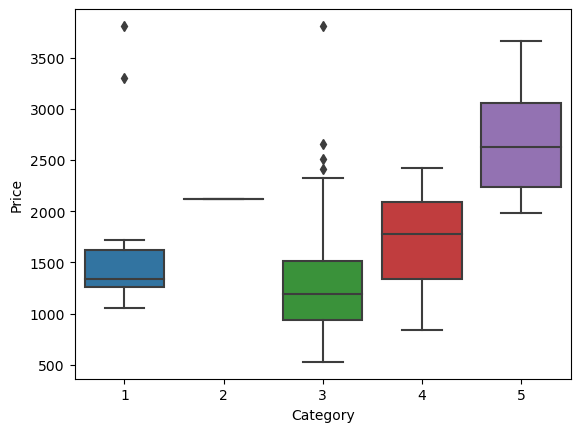

In [15]:
sns.boxplot(x='Category', y='Price', data=df)

<Axes: xlabel='GPU', ylabel='Price'>

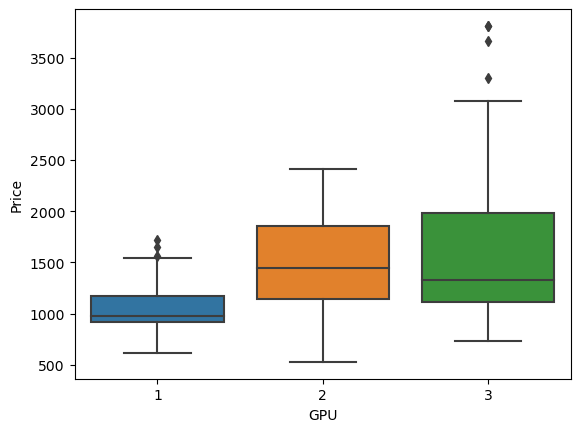

In [16]:
sns.boxplot(x='GPU', y='Price', data=df)

<Axes: xlabel='OS', ylabel='Price'>

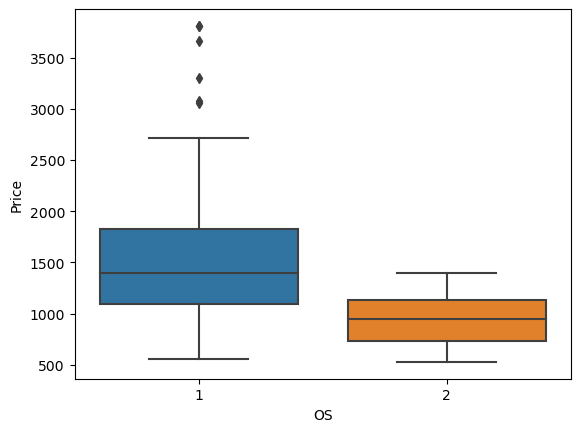

In [17]:
sns.boxplot(x='OS', y='Price', data=df)

<Axes: xlabel='CPU_core', ylabel='Price'>

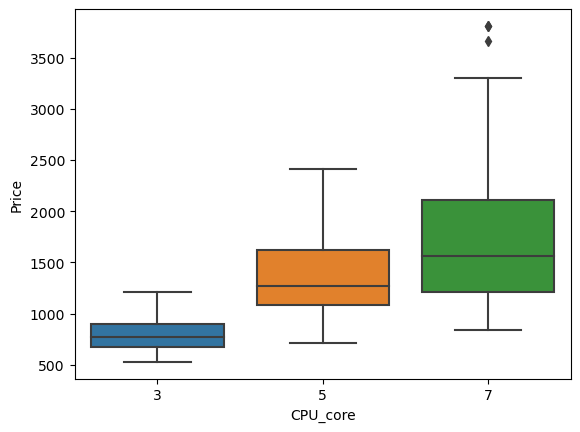

In [18]:
sns.boxplot(x='CPU_core', y='Price', data=df)

<Axes: xlabel='RAM_GB', ylabel='Price'>

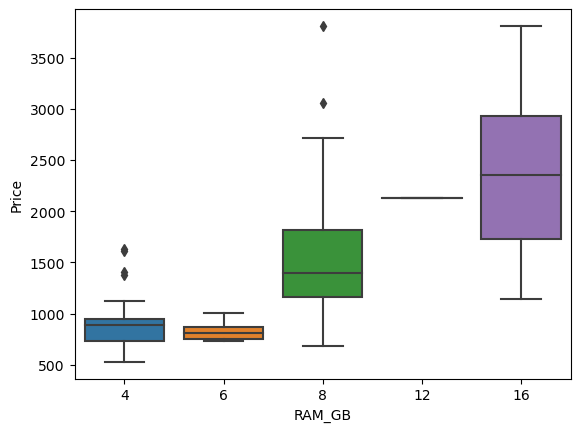

In [20]:
sns.boxplot(x='RAM_GB', y='Price', data=df)

<Axes: xlabel='Storage_GB_SSD', ylabel='Price'>

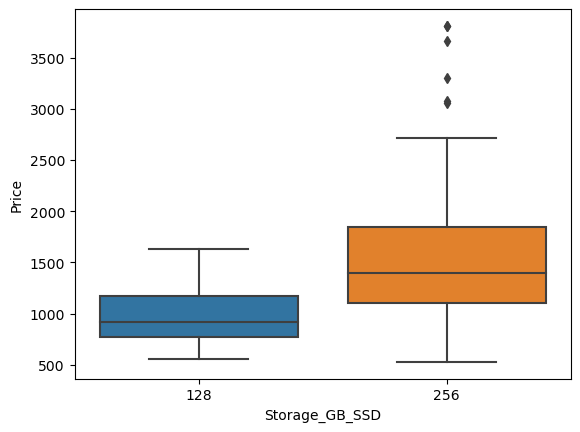

In [21]:
sns.boxplot(x='Storage_GB_SSD', y='Price', data=df)

# DESCRIPTIVE STATISTICAL ANALYSIS

In [24]:
df.describe()

,Unnamed: 0.1,Unnamed: 0,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Screen-Full_HD,Screen-IPS_panel
count,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000
mean,118.500000,118.500000,3.205882,2.151261,1.058824,5.630252,14.688655,0.813822,7.882353,245.781513,4.106221,1462.344538,0.676471,0.323529
std,68.848868,68.848868,0.776533,0.638282,0.235790,1.241787,1.166045,0.141860,2.482603,34.765316,1.078442,574.607699,0.468809,0.468809
min,0.000000,0.000000,1.000000,1.000000,1.000000,3.000000,12.000000,0.413793,4.000000,128.000000,1.786050,527.000000,0.000000,0.000000
25%,59.250000,59.250000,3.000000,2.000000,1.000000,5.000000,14.000000,0.689655,8.000000,256.000000,3.246863,1066.500000,0.000000,0.000000
50%,118.500000,118.500000,3.000000,2.000000,1.000000,5.000000,15.000000,0.862069,8.000000,256.000000,4.106221,1333.000000,1.000000,0.000000
75%,177.750000,177.750000,4.000000,3.000000,1.000000,7.000000,15.600000,0.931034,8.000000,256.000000,4.851000,1777.000000,1.000000,1.000000
max,237.000000,237.000000,5.000000,3.000000,2.000000,7.000000,17.300000,1.000000,16.000000,256.000000,7.938000,3810.000000,1.000000,1.000000


In [25]:
df.describe(include=['object'])

,Manufacturer,Price-binned
count,238,238
unique,11,3
top,Dell,Low
freq,71,160


# GROUPBY AND PIVOT TABLES

In [26]:
df_gptest = df[['GPU', 'CPU_core', 'Price']]
grouped_test1 = df_gptest.groupby(['GPU', 'CPU_core'], as_index=False).mean()
print(grouped_test1)

   GPU  CPU_core        Price
0    1         3   769.250000
1    1         5   998.500000
2    1         7  1167.941176
3    2         3   785.076923
4    2         5  1462.197674
5    2         7  1744.621622
6    3         3   784.000000
7    3         5  1220.680000
8    3         7  1945.097561


In [27]:
grouped_pivot = grouped_test1.pivot(index='GPU', columns='CPU_core')
grouped_pivot

Price                          
CPU_core           3            5            7
GPU                                           
1         769.250000   998.500000  1167.941176
2         785.076923  1462.197674  1744.621622
3         784.000000  1220.680000  1945.097561

# PEARSON CORRELATION AND P-VALUES

In [29]:
for param in ['RAM_GB', 'CPU_frequency', 'Storage_GB_SSD', 'Screen_Size_inch', 'Weight_pounds', 'CPU_core', 'OS', 'GPU', 'Category']:
    pearson_coef, p_value = stats.pearsonr(df[param],df['Price'])
    print(param)
    print('the pearson correlation coefficient for', param, ' is', pearson_coef, 'with a p-value of p =', p_value)

RAM_GB
the pearson correlation coefficient for RAM_GB  is 0.5492972971857841 with a p-value of p = 3.6815606288429613e-20
CPU_frequency
the pearson correlation coefficient for CPU_frequency  is 0.36666555892588604 with a p-value of p = 5.5024633507134225e-09
Storage_GB_SSD
the pearson correlation coefficient for Storage_GB_SSD  is 0.2434207552181029 with a p-value of p = 0.00014898923191724174
Screen_Size_inch
the pearson correlation coefficient for Screen_Size_inch  is -0.11064420817118269 with a p-value of p = 0.08853397846830759
Weight_pounds
the pearson correlation coefficient for Weight_pounds  is -0.05031225837751549 with a p-value of p = 0.4397693853433899
CPU_core
the pearson correlation coefficient for CPU_core  is 0.45939777733551157 with a p-value of p = 7.912950127009034e-14
OS
the pearson correlation coefficient for OS  is -0.2217298011482738 with a p-value of p = 0.0005696642559246759
GPU
the pearson correlation coefficient for GPU  is 0.2882981988881428 with a p-value of